In [62]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
import warnings 
warnings.filterwarnings(action= 'ignore')

#modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn import metrics

In [4]:
# Import file
df = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS-599B/main/Data%20Folder/new_elpac.csv')
df.head()#check the head

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,OverallScore,OverallLevel,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,OverallScoreStd,TotalAssessments,TestInstance,Growth
0,3,1,0,4,0,1,1,6,1503,4,180.0,175.0,1.0,1.972222,0,4,3,0.740042,3,1,0
1,3,2,0,4,0,1,1,5,1549,4,180.0,175.0,1.0,2.972222,0,22,3,0.725455,3,2,0
2,3,3,0,4,0,1,1,5,1466,2,180.0,177.0,1.0,3.983333,0,25,3,0.605364,3,3,-2
3,5,4,1,4,0,0,1,0,1535,3,180.0,168.0,1.0,4.933333,0,2,5,0.662651,1,1,0
4,6,3,1,4,0,0,1,6,1412,1,180.0,179.0,1.0,3.994444,0,2,3,0.501916,3,1,0


In [5]:
from sklearn.model_selection import train_test_split

X = df.loc[ : , df.columns != 'OverallLevel']
y = df[['OverallLevel']]
#split 70% train 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6622, 20) (6622, 1) (2838, 20) (2838, 1)


In [7]:
#create a new dataframe, will convert the Y variable to categorical
df.X = df.copy()
df.X.shape

(9460, 21)

In [22]:
# convert the OverallLevel to categorical 
df['results'] = 'na'
df.X.loc[(df.X.OverallLevel== 4),'results']= 'pass'
df.X.loc[(df.X.OverallLevel== 3),'results']= 'fair'
df.X.loc[(df.X.OverallLevel<= 2) ,'results']= 'poor'
df.X.drop(columns=['OverallLevel'])#drop the overall column

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,OverallScore,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,OverallScoreStd,TotalAssessments,TestInstance,Growth,results
0,3,1,0,4,0,1,1,6,1503,180.0,175.0,1.000000,1.972222,0,4,3,0.740042,3,1,0,pass
1,3,2,0,4,0,1,1,5,1549,180.0,175.0,1.000000,2.972222,0,22,3,0.725455,3,2,0,pass
2,3,3,0,4,0,1,1,5,1466,180.0,177.0,1.000000,3.983333,0,25,3,0.605364,3,3,-2,poor
3,5,4,1,4,0,0,1,0,1535,180.0,168.0,1.000000,4.933333,0,2,5,0.662651,1,1,0,fair
4,6,3,1,4,0,0,1,6,1412,180.0,179.0,1.000000,3.994444,0,2,3,0.501916,3,1,0,poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,6,1,1,4,1,0,0,0,1397,170.0,140.0,0.944444,1.823529,0,7,7,0.517820,1,1,0,poor
9456,4,4,0,4,0,1,1,6,1362,130.0,105.0,0.722222,4.807692,0,13,3,0.364888,1,1,0,poor
9457,9,0,0,4,0,0,1,0,1523,130.0,96.0,0.722222,0.738462,0,13,3,0.678182,1,1,0,pass
9458,4,3,1,4,0,1,1,1,1359,130.0,106.0,0.722222,3.815385,0,23,3,0.400383,1,1,0,poor


In [25]:
print(df.X.shape) #confirm shape and make sure the column has bene dropped
print(df.X.results)


(9460, 22)
0       pass
1       pass
2       poor
3       fair
4       poor
        ... 
9455    poor
9456    poor
9457    pass
9458    poor
9459    poor
Name: results, Length: 9460, dtype: object


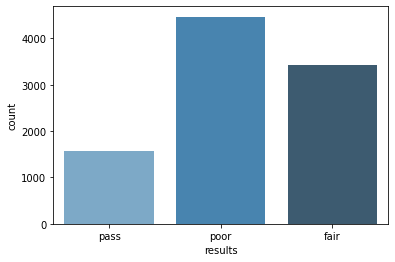

<Figure size 432x288 with 0 Axes>

In [36]:
#check the distribution for the new target variable
sns.countplot("results", data=df.X, palette='Blues_d')
plt.show()


In [46]:
#breakdown of the classes
pass_count = len(df.X[df.X['results']=='pass'])
print("pass count is", pass_count,"students")
poor_count = len(df.X[df.X['results']=='poor'])
print("poor count is", poor_count,"students")
fair_count = len(df.X[df.X['results']=='fair'])
print("fair count is",fair_count,"students")
total_count = (pass_count+poor_count+fair_count)
print ("the total student count is", total_count)

pass count is 1561 students
poor count is 4468 students
fair count is 3431 students
the total student count is 9460


In [51]:
#percent class breakdown
pd.options.display.float_format = '{:.2f}'.format
pass_count_percent = (pass_count/total_count)*100
print("the percentage of students in pass are", pass_count_percent,"%")
poor_count_percent = (poor_count/total_count)*100
print("the percentage of students in poor are", poor_count_percent,"%")
fair_count_percent = (fair_count/total_count)*100
print("the percentage of students in fair are", fair_count_percent,"%")

the percentage of students in pass are 16.50105708245243 %
the percentage of students in poor are 47.23044397463002 %
the percentage of students in fair are 36.268498942917546 %


In [ ]:
from sklearn.utils import resample

lev1_upsample = resample(lev_1,replace=True,n_samples=len(lev_3),random_state=42)
lev2_upsample = resample(lev_2,replace=True,n_samples=len(lev_3),random_state=42)
lev4_upsample = resample(lev_4,replace=True,n_samples=len(lev_3),random_state=42)

<AxesSubplot:xlabel='results', ylabel='count'>

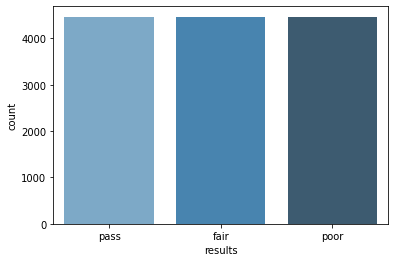

In [55]:
#balance the classes
lev_0 = df.X[df.X['results'] == 'pass']
lev_1 = df.X[df.X['results'] == 'fair']
lev_2 = df.X[df.X['results'] == 'poor']

from sklearn.utils import resample
#resample the target class

lev0_upsample = resample(lev_0,replace=True,n_samples=len(lev_2),random_state=42)
lev1_upsample = resample(lev_1,replace=True,n_samples=len(lev_2),random_state=42)
frames = (lev0_upsample, lev1_upsample, lev_2)
df.X = pd.concat(frames)
#plot target class
fig_size=(12,8)
sns.countplot(df.X['results'], data = df.X, palette = 'Blues_d')

In [56]:
X = df.X.loc[ : , df.columns != 'results']
y = df.X[['results']]
#split 70% train 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9382, 21) (9382, 1) (4022, 21) (4022, 1)


In [57]:
#check the mean
df.X.groupby('results').mean()

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,OverallScore,OverallLevel,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,OverallScoreStd,TotalAssessments,TestInstance,Growth
results,,,,,,,,,,,,,,,,,,,,,
fair,4.13,2.99,0.47,3.97,0.07,0.08,0.80,3.30,1499.26,3.00,176.88,165.66,0.98,3.92,0.07,13.80,4.21,0.63,3.05,1.98,0.19
pass,4.30,2.70,0.46,3.88,0.04,0.07,0.78,3.31,1548.44,4.00,176.93,165.58,0.98,3.64,0.09,12.76,4.27,0.73,2.54,1.93,0.42
poor,4.13,2.86,0.56,3.94,0.20,0.09,0.84,3.38,1432.96,1.62,176.36,162.72,0.98,3.78,0.11,14.51,4.10,0.52,3.07,2.00,-0.21


# Logistic Regression Model

In [60]:
#logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)


array(['poor', 'pass', 'fair', ..., 'pass', 'poor', 'pass'], dtype=object)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#because we are dealing with multiclass have to pick an average, the dataset is already balanced for precision and recall
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

Accuracy: 0.6872202884137245
Precision: 0.6823147966958946
Recall: 0.687937209498652


In [63]:
#confusion matrix
logreg_matrix = metrics.confusion_matrix(y_test, y_pred)
logreg_matrix

array([[ 687,  383,  279],
       [ 351,  994,    0],
       [ 151,   94, 1083]], dtype=int64)

# Naive Bayes Model